# Diabetes Predictor


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
data = pd.read_csv("./diabetes.csv")

In [3]:
data.rename(columns = {'Pregnancies' : 'num_preg' , 'Glucose' : 'glucose',
                      'BloodPressure' : 'bp' , 'SkinThickness' : 'skinthick',
                       'Insulin' : 'insulin',
                      'BMI' : 'bmi' , 'DiabetesPedigreeFunction' : 'diab_pred',
                      'Age' : 'age' , 'Outcome' : 'result'}, inplace = True)

## Generally Blood Sugar itslef is a good criterion to judge if a person is diabetic or not but not here. 

### Here , even when glucose is above 140, 31.25% people are not diabetic

In [4]:
data2 = data[data['glucose'] > 140]

diabetes = len(data2.loc[data['result'] == 1])
no_diabetes = len(data2.loc[data['result'] == 0])

In [5]:
(diabetes,no_diabetes)

(132, 60)

In [6]:
data.isnull().values.any()

False

## Correlation

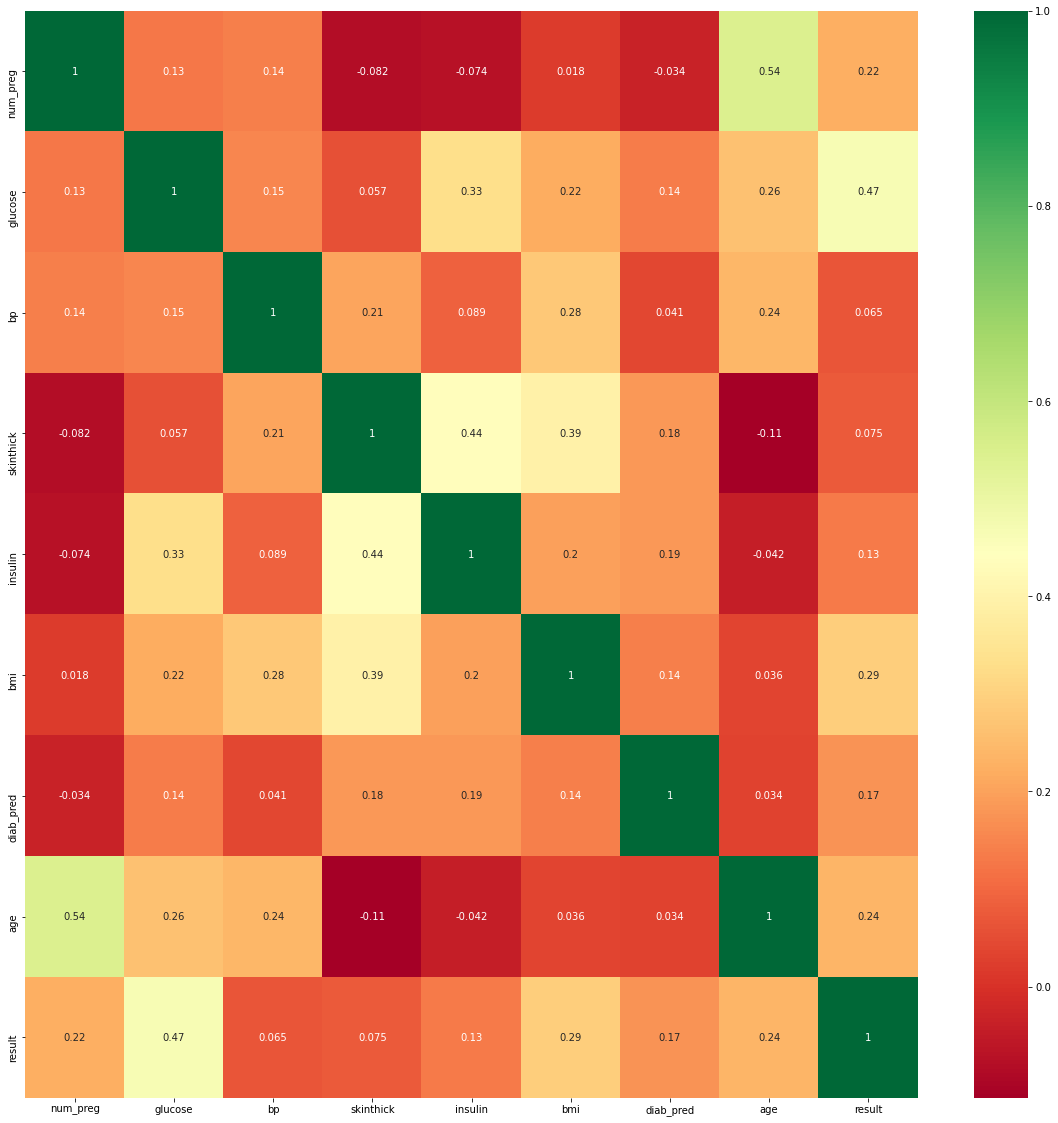

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#heat map

g= sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
data.corr()

,num_preg,glucose,bp,skinthick,insulin,bmi,diab_pred,age,result
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skinthick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
result,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
diabetes_count = len(data.loc[data['result'] == 1])
no_diabetes_count = len(data.loc[data['result'] == 0])

(diabetes_count,no_diabetes_count)

(268, 500)

## Starting Train Test Split

In [10]:
# Train Test Split

from sklearn.model_selection import train_test_split

x = data.iloc[:,0:8]
y = data.iloc[:,8]

x.head()

,num_preg,glucose,bp,skinthick,insulin,bmi,diab_pred,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
x.columns

Index(['num_preg', 'glucose', 'bp', 'skinthick', 'insulin', 'bmi', 'diab_pred',
       'age'],
      dtype='object')

In [12]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: result, dtype: int64

In [13]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['bp'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['diab_pred'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['skinthick'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [15]:
#Train and Test data

from sklearn.model_selection import train_test_split
x=x.values
y=y.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [16]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=0, strategy='mean')

x_train = imputer.fit_transform(x_train)
x_test = imputer.fit_transform(x_test)

## Standardization Of Data

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_trainSd = sc.fit_transform(x_train)
x_testSd = sc.transform(x_test)

## Training Of Random Forest Classifier Model

In [18]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier

In [19]:
from sklearn.model_selection import RandomizedSearchCV

final_model = RandomForestClassifier(n_estimators = 10, 
                                     criterion = 'entropy', 
                                     random_state = 0)
final_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [20]:
y_pred = final_model.predict(x_test)

y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[94 13]
 [17 30]]


0.8051948051948052

In [23]:
from sklearn.ensemble import RandomForestClassifier
final_model_check = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
final_model_check.fit(x, y)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Creating Pickle File

In [24]:
import pickle
filename = 'diabetes.pkl'
pickle.dump(final_model, open(filename, 'wb'))